In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

 Basic concepts and mathematics
 There are two kinds of variables in a linear regression model:
 * The input or predictor variable is the variable(s) that help predict the value of the output variable. It is commonly referred to as X
 * The output variable is the variable that we want to predict. It is commonly referred to as Y.
 To estimate Y using linear regression, we assume the equation:
 y = ax + b

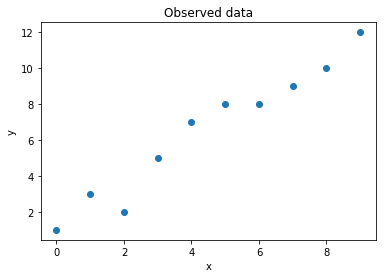

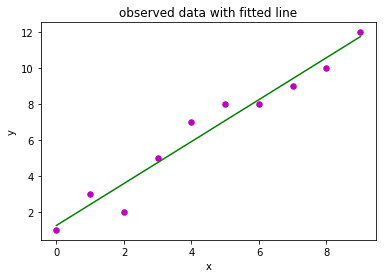

In [9]:

import numpy as np 
import matplotlib.pyplot as plt 
  
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 
def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
               marker = "o", s = 30) 
  
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
  
    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 
  
    # putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 
    plt.title('observed data with fitted line')
    # function to show plot 
    plt.show() 

def plot_data(x,y):
    plt.scatter(x, y) 
    plt.xlabel('x') 
    plt.ylabel('y') 
    plt.title('Observed data')
    plt.show()
def main(): 
    # observations 
    x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 
    y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12]) 
    # plot observed data
    plot_data(x,y)
    # estimating coefficients 
    b = estimate_coef(x, y) 
    #print("Estimated coefficients:\nb_0 = {) \nb_1 = {}".format(b[0], b[1])) 
  
    # plotting regression line 
    plot_regression_line(x, y, b) 
  
if __name__ == "__main__": 
    main() 


In [3]:
# read csv (comma separated value) into data
data = pd.read_csv('column_2C_weka.csv')

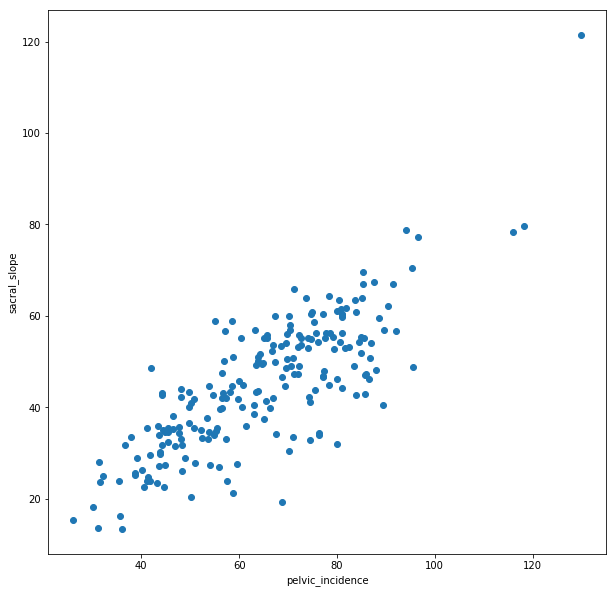

In [4]:
data1 = data[data['class'] =='Abnormal']
x = np.array(data1.loc[:,'pelvic_incidence']).reshape(-1,1)
y = np.array(data1.loc[:,'sacral_slope']).reshape(-1,1)
# Scatter
plt.figure(figsize=[10,10])
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

Now we have our data to make regression. In regression problems target value is continuously varying variable such as price of house or sacral_slope. Lets fit line into this points.
Linear regression
* y = ax + b where y = target, x = feature and a = parameter of model
* We choose parameter of model(a) according to minimum error function that is lost function
* In linear regression we use Ordinary Least Square (OLS) as lost function.
* OLS: sum all residuals but some positive and negative residuals can cancel each other so we sum of square of residuals. It is called OLS
* Score: Score uses R^2 method that is ((y_pred - y_mean)^2 )/(y_actual - y_mean)^2
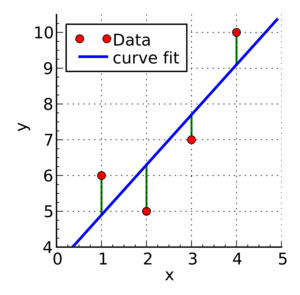

The objective of the least squares method is to find values of α and β that minimise the sum of the squared difference between Y and Yₑ. We will not go through the derivation here, but using calculus we can show that the values of the unknown parameters are as follows:
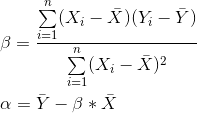
where X̄ is the mean of X values and Ȳ is the mean of Y values.
If you are familiar with statistics, you may recognise β as simply 
Cov(X, Y) / Var(X).

R^2 score:  0.6458410481075871


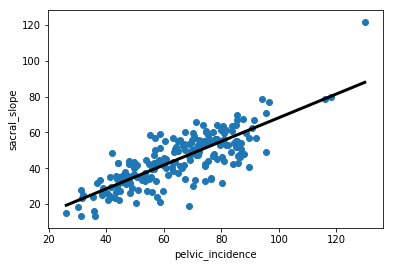

In [5]:
# LinearRegression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
# Predict space
predict_space = np.linspace(min(x), max(x)).reshape(-1,1)
# Fit
reg.fit(x,y)
# Predict
predicted = reg.predict(predict_space)
# R^2 
print('R^2 score: ',reg.score(x, y))
# Plot regression line and scatter
plt.plot(predict_space, predicted, color='black', linewidth=3)
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

CROSS VALIDATION

As you know in KNN method we use train test split with random_state that split exactly same at each time. However, if we do not use random_state, data is split differently at each time and according to split accuracy will be different. Therefore, we can conclude that model performance is dependent on train_test_split. For example you split, fit and predict data 5 times and accuracies are 0.89, 0.9, 0.91, 0.92 and 0.93, respectively. Which accuracy do you use? Do you know what accuracy will be at 6th times split, train and predict. The answer is I do not know but if I use cross validation I can find acceptable accuracy.
Cross Validation (CV)
* K folds = K fold CV.
* Look at this image it defines better than me
* When K is increase, computationally cost is increase
* cross_val_score(reg,x,y,cv=5): use reg(linear regression) with x and y that we define at above and K is 5. It means 5 times(split, train,predict)


In [6]:
# CV
from sklearn.model_selection import cross_val_score
reg = LinearRegression()
k = 5
cv_result = cross_val_score(reg,x,y,cv=k) # uses R^2 as score 
print('CV Scores: ',cv_result)
print('CV scores average: ',np.sum(cv_result)/k)

CV Scores:  [0.32924233 0.61683991 0.53117056 0.1954798  0.29299864]
CV scores average:  0.3931462502884867


Regularized Regression

As we learn linear regression choose parameters (coefficients) while minimizing lost function. If linear regression thinks that one of the feature is important, it gives high coefficient to this feature. However, this can cause overfitting that is like memorizing in KNN. In order to avoid overfitting, we use regularization that penalize large coefficients
* Ridge regression: First regularization technique. Also it is called L2 regularization. 
    * Ridge regression lost fuction = OLS + alpha * sum(parameter^2)
    * alpha is parameter we need to choose to fit and predict. Picking alpha is similar to picking K in KNN. As you understand alpha is hyperparameter that we need to choose for best accuracy and model complexity. This process is called hyperparameter tuning..
    * What if alpha is zero? lost function = OLS so that is linear rigression
    * If alpha is small that can cause overfitting
    * if alpha is big that can cause underfitting. But do not ask what is small and big. These can be change from problem to problem.
* Lasso regression: Second regularization technique. Also it is called L1 regularization. 
    * Lasso regression lost fuction = OLS + alpha * sum(absolute_value(parameter))
    * It can be used to select important features od the data. Because features whose values are not shrinked to zero, is chosen by lasso regression
    * In order to choose feature, I add new features in our regression data
    
Linear vs Ridge vs Lasso First impression: Linear Feature Selection: 1.Lasso 2.Ridge Regression model: 1.Ridge 2.Lasso 3.Linear

In [9]:
# Ridge
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 2, test_size = 0.3)
ridge = Ridge(alpha = 0.1, normalize = True)
ridge.fit(x_train,y_train)
ridge_predict = ridge.predict(x_test)
print('Ridge score: ',ridge.score(x_test,y_test))

Ridge score:  0.5608287918841997


In [10]:
# Lasso
from sklearn.linear_model import Lasso
x = np.array(data1.loc[:,['pelvic_incidence','pelvic_tilt numeric','lumbar_lordosis_angle','pelvic_radius']])
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 3, test_size = 0.3)
lasso = Lasso(alpha = 0.1, normalize = True)
lasso.fit(x_train,y_train)
ridge_predict = lasso.predict(x_test)
print('Lasso score: ',lasso.score(x_test,y_test))
print('Lasso coefficients: ',lasso.coef_)

Lasso score:  0.9640334804327547
Lasso coefficients:  [ 0.82498243 -0.7209057   0.         -0.        ]
